<a href="https://colab.research.google.com/github/mansiraturi/BookBea/blob/main/FDAProj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


**1. DATA ACQUISITION**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
crime= pd.read_csv('/content/drive/MyDrive/content/Crime_Data_from_2020_to_Present.csv', delimiter=",")


**2. DATA INSPECTION**

Displaying the first few rows

In [ ]:
crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [ ]:
crime.shape

(820599, 28)

Checking the datatypes of each column

In [ ]:
crime.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [ ]:
crime.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,8.205990e+05,820599.000000,820599.000000,820599.000000,820599.000000,820599.000000,820599.000000,820589.000000,286078.000000,820589.000000,60413.000000,2025.000000,60.000000,820599.000000,820599.000000
mean,2.161299e+08,1335.627492,10.711722,1117.592487,1.413828,500.803992,29.806031,305.759386,362.916586,500.542192,957.477927,983.615309,990.750000,33.604765,-116.725860
std,1.083045e+07,654.020941,6.093656,609.360686,0.492519,207.807715,21.776511,216.670080,123.754162,207.596108,111.524441,52.844921,27.908218,3.970446,13.786369
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-3.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.000000,0.000000,-118.667600
25%,2.102046e+08,900.000000,6.000000,621.000000,1.000000,331.000000,7.000000,101.000000,310.000000,331.000000,998.000000,998.000000,998.000000,34.010200,-118.428700
50%,2.201176e+08,1415.000000,11.000000,1142.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.057500,-118.319300
75%,2.220056e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.161600,-118.273100
max,2.399165e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820599 entries, 0 to 820598
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           820599 non-null  int64  
 1   Date Rptd       820599 non-null  object 
 2   DATE OCC        820599 non-null  object 
 3   TIME OCC        820599 non-null  int64  
 4   AREA            820599 non-null  int64  
 5   AREA NAME       820599 non-null  object 
 6   Rpt Dist No     820599 non-null  int64  
 7   Part 1-2        820599 non-null  int64  
 8   Crm Cd          820599 non-null  int64  
 9   Crm Cd Desc     820599 non-null  object 
 10  Mocodes         707114 non-null  object 
 11  Vict Age        820599 non-null  int64  
 12  Vict Sex        712653 non-null  object 
 13  Vict Descent    712645 non-null  object 
 14  Premis Cd       820589 non-null  float64
 15  Premis Desc     820116 non-null  object 
 16  Weapon Used Cd  286078 non-null  float64
 17  Weapon Des

**STEP 3: DATA CLEANING**

3.1 Handling Missing Data

In [ ]:
print(crime.isnull().mean())

DR_NO             0.000000
Date Rptd         0.000000
DATE OCC          0.000000
TIME OCC          0.000000
AREA              0.000000
AREA NAME         0.000000
Rpt Dist No       0.000000
Part 1-2          0.000000
Crm Cd            0.000000
Crm Cd Desc       0.000000
Mocodes           0.138295
Vict Age          0.000000
Vict Sex          0.131545
Vict Descent      0.131555
Premis Cd         0.000012
Premis Desc       0.000589
Weapon Used Cd    0.651379
Weapon Desc       0.651379
Status            0.000000
Status Desc       0.000000
Crm Cd 1          0.000012
Crm Cd 2          0.926379
Crm Cd 3          0.997532
Crm Cd 4          0.999927
LOCATION          0.000000
Cross Street      0.840100
LAT               0.000000
LON               0.000000
dtype: float64


In [ ]:
#Dropping rows where all are null values
crime.dropna(how='all', inplace=True)
#cases with mocodes
crime.dropna(subset=['Mocodes'], inplace=True)

In [ ]:
crime['Vict Sex'].fillna('X', inplace=True)
crime['Vict Descent'].fillna('X', inplace=True)
crime['Weapon Desc'].fillna('No Weapon Used', inplace=True)
crime['Weapon Used Cd'].fillna('NA', inplace=True)
crime['Cross Street'].fillna('Info Not Recorded', inplace=True)
crime['Premis Desc'].fillna('Not Known', inplace=True)

In [ ]:
crime['Vict Sex'] = crime['Vict Sex'].replace('-', 'X')


In [ ]:
print(crime.isnull().mean())

DR_NO             0.000000
Date Rptd         0.000000
DATE OCC          0.000000
TIME OCC          0.000000
AREA              0.000000
AREA NAME         0.000000
Rpt Dist No       0.000000
Part 1-2          0.000000
Crm Cd            0.000000
Crm Cd Desc       0.000000
Mocodes           0.000000
Vict Age          0.000000
Vict Sex          0.000000
Vict Descent      0.000000
Premis Cd         0.000000
Premis Desc       0.000000
Weapon Used Cd    0.000000
Weapon Desc       0.000000
Status            0.000000
Status Desc       0.000000
Crm Cd 1          0.000014
Crm Cd 2          0.914840
Crm Cd 3          0.997139
Crm Cd 4          0.999915
LOCATION          0.000000
Cross Street      0.000000
LAT               0.000000
LON               0.000000
dtype: float64


In [ ]:
crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,Info Not Recorded,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,Info Not Recorded,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,Info Not Recorded,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,Info Not Recorded,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,Info Not Recorded,34.2198,-118.4468


In [ ]:
print(crime.isnull().mean())

DR_NO             0.000000
Date Rptd         0.000000
DATE OCC          0.000000
TIME OCC          0.000000
AREA              0.000000
AREA NAME         0.000000
Rpt Dist No       0.000000
Part 1-2          0.000000
Crm Cd            0.000000
Crm Cd Desc       0.000000
Mocodes           0.000000
Vict Age          0.000000
Vict Sex          0.000000
Vict Descent      0.000000
Premis Cd         0.000000
Premis Desc       0.000000
Weapon Used Cd    0.000000
Weapon Desc       0.000000
Status            0.000000
Status Desc       0.000000
Crm Cd 1          0.000014
Crm Cd 2          0.914840
Crm Cd 3          0.997139
Crm Cd 4          0.999915
LOCATION          0.000000
Cross Street      0.000000
LAT               0.000000
LON               0.000000
dtype: float64


3.2 Drop Duplicates

In [ ]:
crime.duplicated(subset=['DR_NO']).sum() #check if the unique column has any duplicate entries

0

In [ ]:
crime = crime.drop_duplicates()
crime.shape

(707114, 28)

3.3 Convert Data Types to appropriate forms

In [ ]:
crime.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd     object
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [ ]:
# Convert the date portion
# crime['Date Rptd'] = pd.to_datetime(crime['Date Rptd'], format='%m/%d/%Y')
# crime['DATE OCC'] = pd.to_datetime(crime['DATE OCC'], format='%m/%d/%Y')
import pandas as pd
import re
# Convert the date and time columns to date-time datatype
crime['Date Rptd'] = pd.to_datetime(crime['Date Rptd'], format='%m/%d/%Y %I:%M:%S %p')
crime['DATE OCC'] = pd.to_datetime(crime['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')
#as the time column doesn't have uniform values throughout the dataset, the 0s are added and separated by colon
crime['TIME OCC'] = crime['TIME OCC'].astype(str).str.zfill(4)
crime['TIME OCC'] = crime['TIME OCC'].apply(lambda x: re.sub(r'[^0-9]', ':', x))
crime['TIME OCC'] = crime['TIME OCC'].apply(lambda x: f'{x[:2]}:{x[2:]}')

#converting to time
crime['TIME OCC'] = pd.to_datetime(crime['TIME OCC'], format='%H:%M').dt.time

#crime['TIME OCC'] = crime['TIME OCC'].apply(lambda x: f'{str(x)[:2]}:{str(x)[2:]}' if len(str(x)) > 2 else str(x))

In [ ]:
crime['TIME OCC'].head()

0    22:30:00
1    03:30:00
2    12:00:00
3    17:30:00
4    04:15:00
Name: TIME OCC, dtype: object

3.4 Deal with Outliers

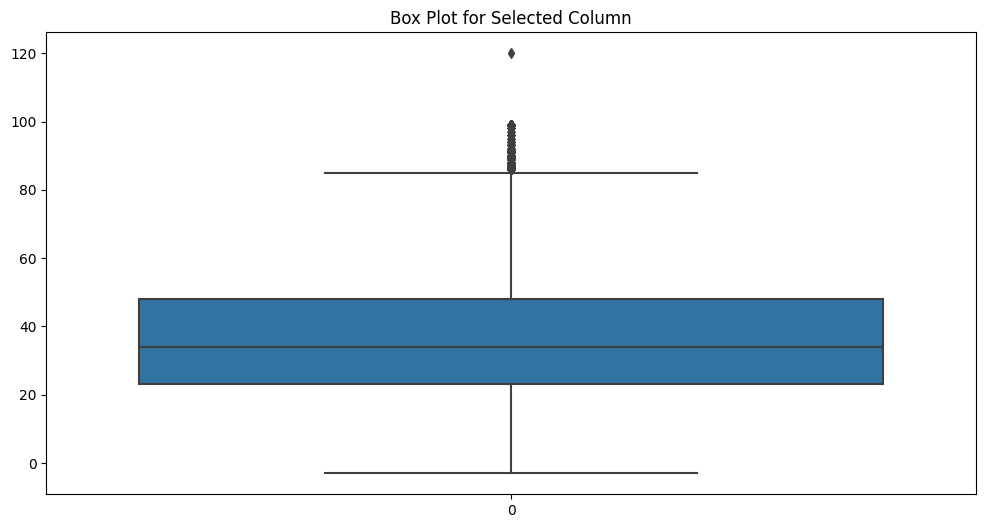

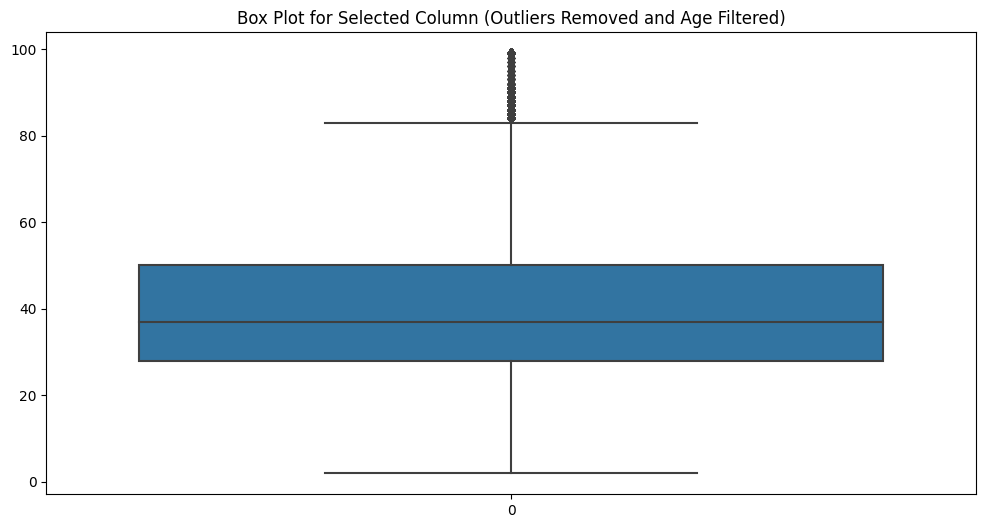

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the column with outliers
selected_column = 'Vict Age'

# Create box plots using seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=crime[selected_column])
plt.title('Box Plot for Selected Column')
plt.show()

# Filter the 'Vict Age' column to include values within the range of 1 to 100
filtered_data = crime[(crime[selected_column] >= 1) & (crime[selected_column] <= 100)]

# Create a new box plot after removing outliers and filtering the age range
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data[selected_column])
plt.title('Box Plot for Selected Column (Outliers Removed and Age Filtered)')
plt.show()


In [ ]:
#Deal with outliers
selected_columns = ['Vict Age', 'Crm Cd', 'Premis Cd','AREA']

# Calculate the IQR for each selected column
iqr_values = {}
for column in selected_columns:
    q1 = crime[column].quantile(0.25)
    q3 = crime[column].quantile(0.75)
    iqr = q3 - q1
    iqr_values[column] = iqr

print("Interquartile Ranges (IQR) for Selected Columns:")
for column, iqr in iqr_values.items():
    print(f"{column}: {iqr:.2f}")

Interquartile Ranges (IQR) for Selected Columns:
Vict Age: 25.00
Crm Cd: 319.00
Premis Cd: 394.00
AREA: 10.00


3.5 Standardisation and Normalisation

In [ ]:
# Calculate the monthly crime count for each year
crime['Year'] = crime['Date Rptd'].dt.year
crime['Month'] = crime['Date Rptd'].dt.month
crime_counts = crime.groupby(['Year', 'Month']).size().unstack(fill_value=0)

# Calculate the number of unique months present in each year
months_per_year = crime.groupby('Year')['Month'].nunique()

# Normalize the annual crime count by dividing it by the number of unique months
annual_crime_count = crime_counts.sum(axis=1)
normalized_annual_crime_count = annual_crime_count / months_per_year

3.6 Encode Categorical Data

In [ ]:
import pandas as pd

# Assuming you've already created the 'Combined_Crime_Codes' column and have a DataFrame named 'crime'

# Count the number of non-empty 'Crm Cd' columns for each row
crime['Number_Filled'] = crime[['Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4']].count(axis=1)

# Map the count to the appropriate category
crime['Combined_Crime_Codes'] = crime['Number_Filled'].apply(lambda count: f'{count} cases')

# Drop the 'Number_Filled' column if not needed
crime.drop('Number_Filled', axis=1, inplace=True)

# Display the DataFrame with the new 'Combined_Crime_Codes' column
print(crime[['Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Combined_Crime_Codes']])


        Crm Cd 1  Crm Cd 2  Crm Cd 3  Crm Cd 4 Combined_Crime_Codes
0          624.0       NaN       NaN       NaN              1 cases
1          624.0       NaN       NaN       NaN              1 cases
2          845.0       NaN       NaN       NaN              1 cases
3          745.0     998.0       NaN       NaN              2 cases
4          740.0       NaN       NaN       NaN              1 cases
...          ...       ...       ...       ...                  ...
820594     740.0       NaN       NaN       NaN              1 cases
820595     230.0       NaN       NaN       NaN              1 cases
820596     230.0       NaN       NaN       NaN              1 cases
820597     352.0       NaN       NaN       NaN              1 cases
820598     745.0       NaN       NaN       NaN              1 cases

[707114 rows x 5 columns]


In [ ]:
# Assuming you have a DataFrame named 'crime' and a 'Weapon Desc' column

# Create a new column 'Weapon_Category' based on 'Weapon Desc'
crime['Weapon'] = (crime['Weapon Desc'] != 'No Weapon Used').astype(int)

# Display the updated DataFrame
print(crime[['Weapon Desc', 'Weapon']])


                                           Weapon Desc  Weapon
0       STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)       1
1                          UNKNOWN WEAPON/OTHER WEAPON       1
2                                       No Weapon Used       0
3                                       No Weapon Used       0
4                                       No Weapon Used       0
...                                                ...     ...
820594                                  No Weapon Used       0
820595  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)       1
820596                     UNKNOWN WEAPON/OTHER WEAPON       1
820597                                  No Weapon Used       0
820598                                  No Weapon Used       0

[707114 rows x 2 columns]


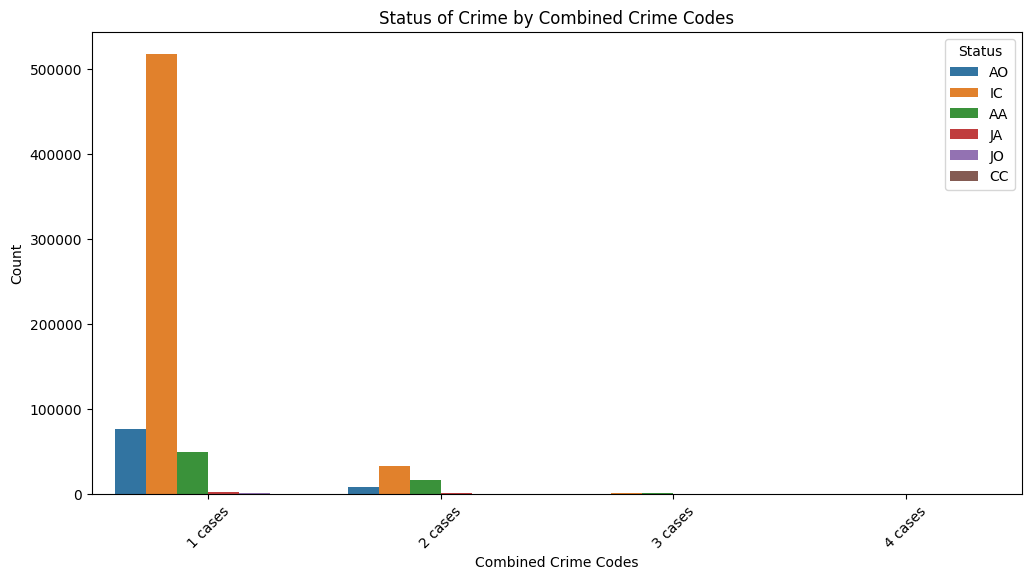

In [ ]:
# Create a countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=crime, x='Combined_Crime_Codes', hue='Status')
plt.title('Status of Crime by Combined Crime Codes')
plt.xlabel('Combined Crime Codes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status', loc='upper right')
plt.show()

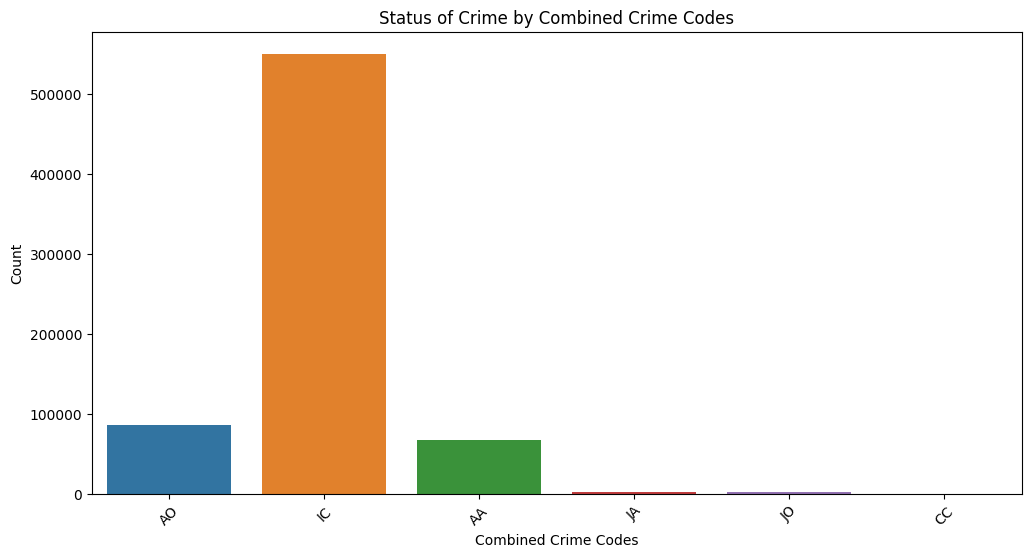

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=crime, x='Status')
plt.title('Status of Crime by Combined Crime Codes')
plt.xlabel('Combined Crime Codes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**EXPLORATORY DATA ANALYSIS**

4.1 Visualising Crime Trends from 2020 to current year

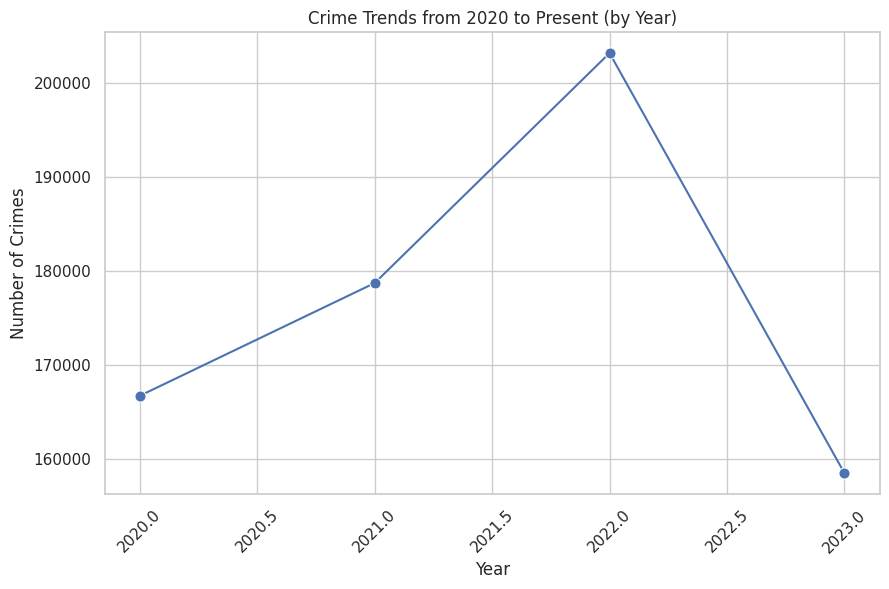

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date Rptd' to datetime
crime['Date Rptd'] = pd.to_datetime(crime['Date Rptd'])

# Filter data for the range from 2020 to the current year
start_year = 2020
current_year = crime['Date Rptd'].max().year
crime_range = crime[(crime['Date Rptd'].dt.year >= start_year) & (crime['Date Rptd'].dt.year <= current_year)]

# Group data by year and count the number of crimes per year
crime_by_year = crime_range['Date Rptd'].dt.year.value_counts().sort_index()

# Create a line plot to visualize the crime trends
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.lineplot(data=crime_by_year, marker="o", markersize=8, color="b")
plt.title("Crime Trends from 2020 to Present (by Year)")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()


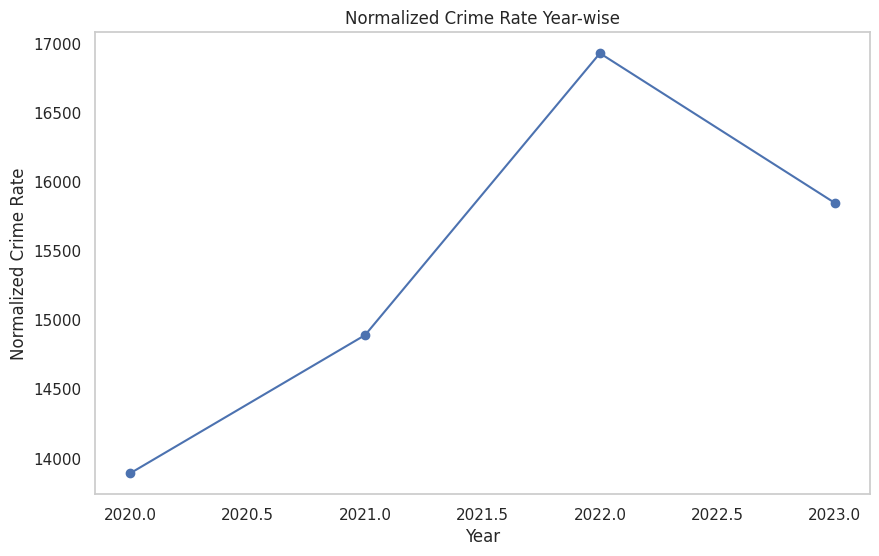

In [ ]:

# Create a line plot to visualize the normalized crime count
plt.figure(figsize=(10, 6))
plt.plot(normalized_annual_crime_count.index, normalized_annual_crime_count.values, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Normalized Crime Rate')
plt.title('Normalized Crime Rate Year-wise')
plt.grid()
plt.show()


4.2 Seasonal Pattern of Crime Data

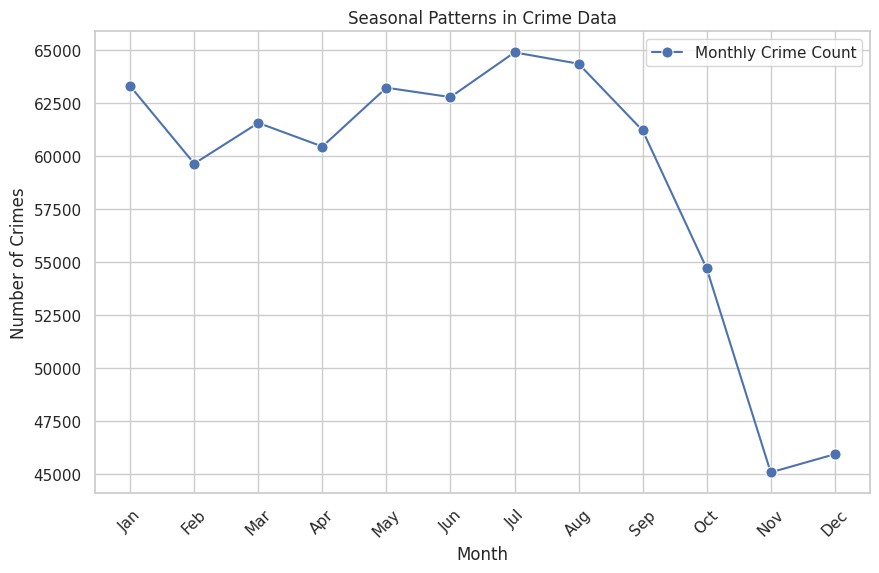

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your crime dataset

# Convert 'DATE OCC' to datetime format and extract the month
crime['DATE OCC'] = pd.to_datetime(crime['DATE OCC'], format='%m/%d/%Y')
crime['Month'] = crime['DATE OCC'].dt.month
crime['Year'] = crime['DATE OCC'].dt.year

# Group data by month and count the occurrences
crime_by_month = crime.groupby('Month').size()


# Create a line plot to visualize the seasonal patterns
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.lineplot(data=crime_by_month, marker="o", markersize=8, color="b", label="Monthly Crime Count")

plt.title("Seasonal Patterns in Crime Data")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xticks(rotation=45)
plt.show()


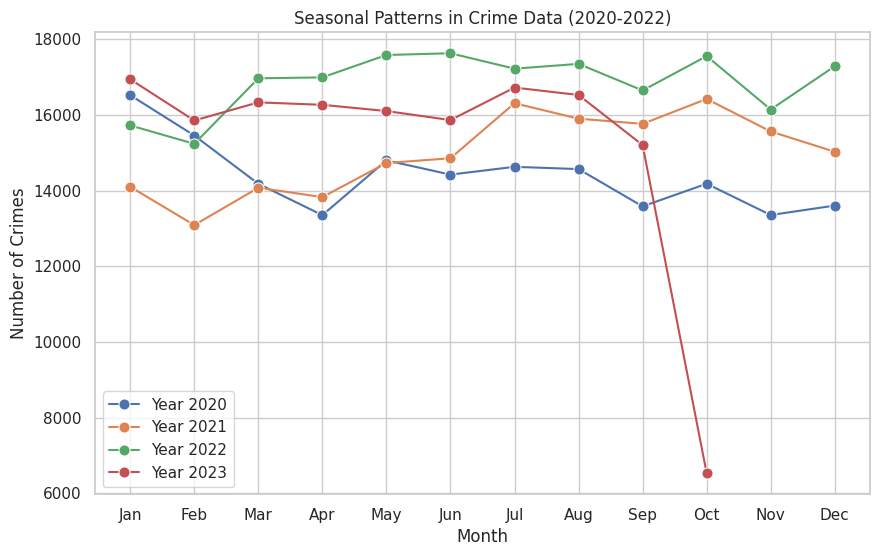

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Group data by year and month and count the occurrences
crime_by_year_month = crime.groupby(['Year', 'Month']).size().unstack()

# Create a line plot to visualize the seasonal patterns for different years
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot different lines for each year
for year in crime_by_year_month.index:
    sns.lineplot(data=crime_by_year_month.loc[year], marker="o", markersize=8, label=f"Year {year}")

plt.title("Seasonal Patterns in Crime Data (2020-2022)")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend()
plt.show()


4.3 Most Common Type of Crime

In [ ]:
crimegrp=  crime.groupby('Crm Cd Desc')
crime.groupby('Crm Cd Desc').size()


Crm Cd Desc
ARSON                                                        1889
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER                  997
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              47189
ATTEMPTED ROBBERY                                            4274
BATTERY - SIMPLE ASSAULT                                    65286
                                                            ...  
VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)      766
VIOLATION OF COURT ORDER                                     5641
VIOLATION OF RESTRAINING ORDER                              10374
VIOLATION OF TEMPORARY RESTRAINING ORDER                      809
WEAPONS POSSESSION/BOMBING                                     30
Length: 137, dtype: int64

In [ ]:
num_groups = crimegrp.ngroups
num_groups

137

In [ ]:
# Assuming your dataset is named 'crime'

# Use the 'Crm Cd Desc' column to count the occurrences of each crime description
crimetype = crime['Crm Cd Desc'].value_counts()
comm_crime= crimetype.index[0]
freq = crimetype.iloc[0]

print("The most common crime type is:", comm_crime, "with a frequency of", freq)


The most common crime type is: BATTERY - SIMPLE ASSAULT with a frequency of 65286


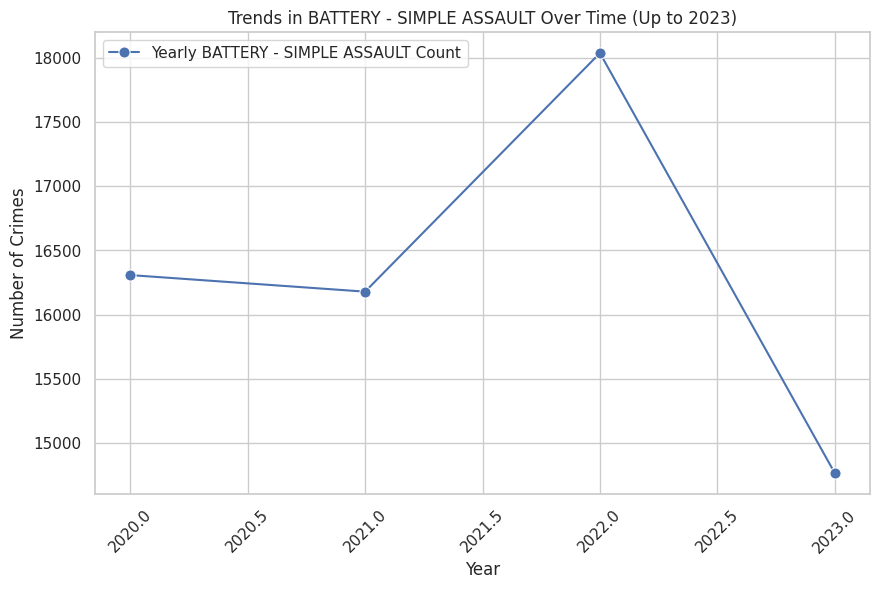

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the most common crime type
most_common_crime_data = crime[crime['Crm Cd Desc'] == comm_crime]

# Find the maximum date in the dataset
latest_date = most_common_crime_data['DATE OCC'].max()

# Filter the data for dates up to the latest date
most_common_crime_data = most_common_crime_data[most_common_crime_data['DATE OCC'] <= latest_date]

# Group the data by year and count the number of occurrences
crime_by_year = most_common_crime_data.groupby('Year').size()

# Create a line plot to visualize the trends over time

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.lineplot(data=crime_by_year, marker="o", markersize=8, color="b", label=f"Yearly {comm_crime} Count")
plt.title(f"Trends in {comm_crime} Over Time (Up to {latest_date.year})")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()


4.4 Crime rates in different regions

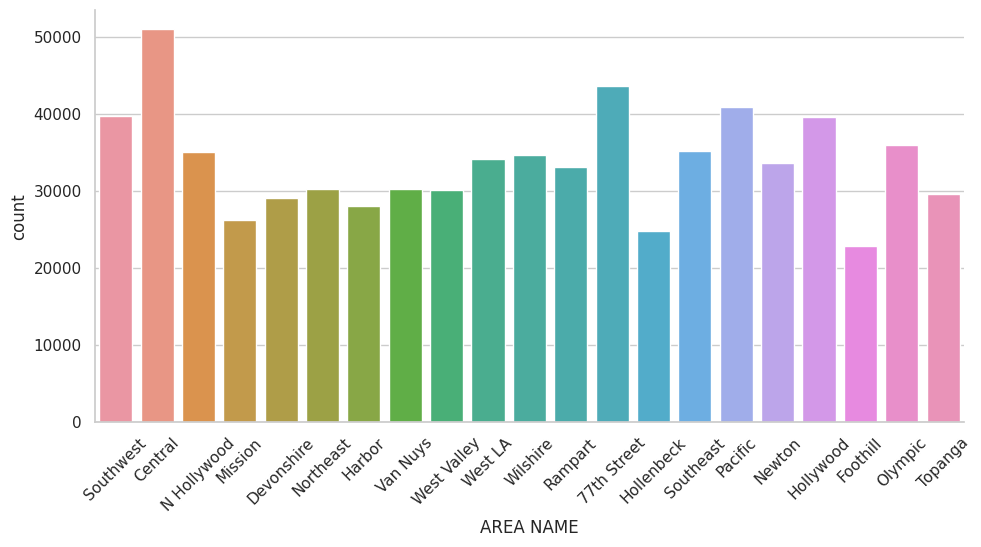

In [ ]:
sns.catplot(x = "AREA NAME",
            data = crime,
            aspect = 2.0,
            kind = "count").set_xticklabels(rotation=45)


4.5 **ECONOMIC FACTORS:**

In [ ]:
gdpdata = pd.read_csv('/content/drive/MyDrive/content/gdpdata.csv', delimiter=",")

In [ ]:
from datetime import datetime
gdpdata['DATE'] = pd.to_datetime(gdpdata['DATE'])

# Filter the DataFrame for dates starting from 2020-01-01
gdpdata = gdpdata[gdpdata['DATE'] >= datetime(2020, 1, 1)]
gdpdata

,DATE,REALGDPALL06037
19,2020-01-01,660011801
20,2021-01-01,711874201


In [ ]:
crime['Year'] = pd.to_datetime(crime['Date Rptd']).dt.year
gdpdata['Year'] = gdpdata['DATE'].dt.year

# Filter data for the years 2020 and 2021
crime_data = crime[(crime['Year'] == 2020) | (crime['Year'] == 2021)]

# Group and count the crimes year-wise
crime_counts = crime_data['Year'].value_counts().reset_index()
crime_counts.columns = ['Year', 'Crime_Count']
merged_data = pd.merge(crime_counts, gdpdata, on='Year')
merged_data['REALGDPALL06037'] = merged_data['REALGDPALL06037'] / 1000
merged_data

,Year,Crime_Count,DATE,REALGDPALL06037
0,2021,178716,2021-01-01,711874.201
1,2020,166720,2020-01-01,660011.801


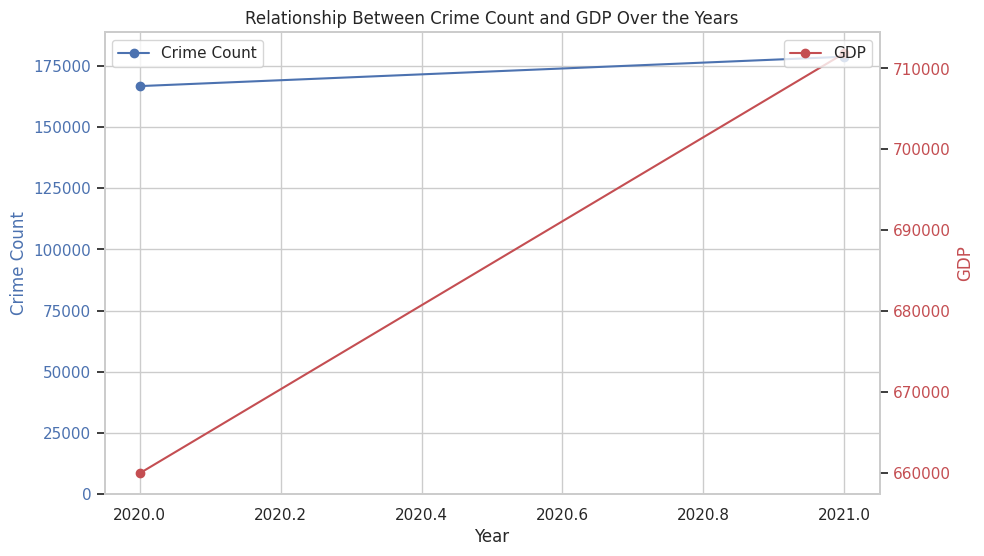

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot 'Crime_Count' on the primary y-axis
ax1.plot(merged_data['Year'], merged_data['Crime_Count'], marker='o', linestyle='-', color='b', label='Crime Count')
ax1.set_xlabel('Year')
ax1.set_ylabel('Crime Count', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Set the limits for the primary y-axis to make the 'Crime Count' visible
ax1.set_ylim(0, max(merged_data['Crime_Count']) + 10000)

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot 'GDP' on the secondary y-axis
ax2.plot(merged_data['Year'], merged_data['REALGDPALL06037'], marker='o', linestyle='-', color='r', label='GDP')
ax2.set_ylabel('GDP', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Set the limits for the secondary y-axis if needed
# ax2.set_ylim(min(merged_data['REALGDPALL06037']) - 1000, max(merged_data['REALGDPALL06037']) + 1000)

# Add titles and legends
plt.title('Relationship Between Crime Count and GDP Over the Years')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid()
plt.show()


Crime Count (Blue Line):

The blue line representing 'Crime Count' has a fluctuating trend.
It shows periodic peaks and valleys, indicating that the number of reported crimes varies over time.
The trend suggests potential periods of increased and decreased crime activity, which may follow a cyclic or seasonal pattern.
GDP (Red Line):

The red line representing 'GDP' (Gross Domestic Product) also exhibits a fluctuating trend.
Similar to the 'Crime Count' line, it has periodic peaks and valleys.
The trend in the GDP line suggests that the economic output, as represented by GDP, experiences variations over the years, possibly following economic cycles.

In [ ]:
unemp = pd.read_csv('/content/drive/MyDrive/content/unemployment.csv', delimiter=",")
unemp.head()

,DATE,CALOSA7URN
0,2020-01-01,4.9
1,2020-02-01,4.9
2,2020-03-01,6.7
3,2020-04-01,17.0
4,2020-05-01,19.0


In [ ]:
unemp.rename(columns={'CALOSA7URN': 'UnempRate'}, inplace=True)
unemp['DATE']= pd.to_datetime(unemp['DATE'])
result = unemp.groupby(unemp['DATE'].dt.year)['UnempRate'].mean().reset_index()

# Rename the columns for clarity
result.columns = ['Year', 'Mean_Rate']

# Display the result
print(result)


   Year  Mean_Rate
0  2020  12.400000
1  2021   8.925000
2  2022   4.916667
3  2023   5.188889


In [ ]:
crime_info = crime[(crime['Year'] == 2020) | (crime['Year'] == 2021) | (crime['Year'] == 2022) | (crime['Year'] == 2023)]
crime_rate = crime_info['Year'].value_counts().reset_index()
crime_rate.columns = ['Year', 'Crime_Count']
emp_crime = pd.merge(crime_rate, result, on='Year')
emp_crime.set_index('Year', inplace=True)
emp_crime.sort_index(inplace=True)
emp_crime

,Crime_Count,Mean_Rate
Year,,
2020,166720,12.400000
2021,178716,8.925000
2022,203185,4.916667
2023,158493,5.188889


In [ ]:
from scipy import stats
min_range = 0
max_range = 1

# Calculate the min and max values for the 'Mean_Rate' column
min_value = emp_crime['Mean_Rate'].min()
max_value = emp_crime['Mean_Rate'].max()

min_cr = emp_crime['Crime_Count'].min()
max_cr = emp_crime['Crime_Count'].max()

# Apply Min-Max normalization to 'Mean_Rate'
emp_crime['Mean_Rate'] = (emp_crime['Mean_Rate'] - min_value) / (max_value - min_value) * (max_range - min_range) + min_range
emp_crime['Crime_Count'] = (emp_crime['Crime_Count'] - min_cr) / (max_cr - min_cr) * (max_range - min_range) + min_range


# Display the DataFrame with the normalized column
print(emp_crime)

      Crime_Count  Mean_Rate
Year                        
2020     0.184082   1.000000
2021     0.452497   0.535635
2022     1.000000   0.000000
2023     0.000000   0.036377


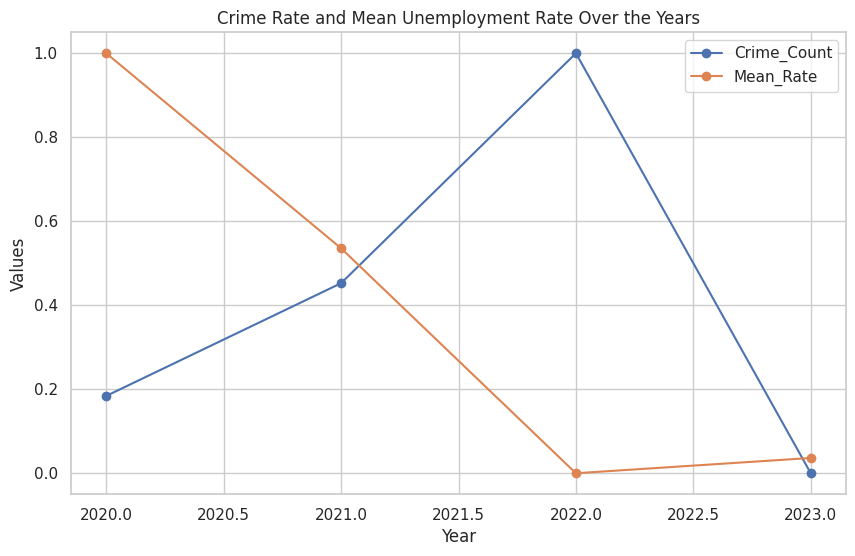

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'emp_crime' with 'Year', 'Crime_Count', and 'Mean_Rate' columns

# Create a line plot
plt.figure(figsize=(10, 6))

# Plot 'Crime_Count' as a line
plt.plot(emp_crime.index, emp_crime['Crime_Count'], marker='o', label='Crime_Count')

# Plot 'Mean_Rate' as a line
plt.plot(emp_crime.index, emp_crime['Mean_Rate'], marker='o', label='Mean_Rate')

plt.title("Crime Rate and Mean Unemployment Rate Over the Years")
plt.xlabel("Year")
plt.ylabel("Values")
plt.legend()
plt.grid(True)

plt.show()


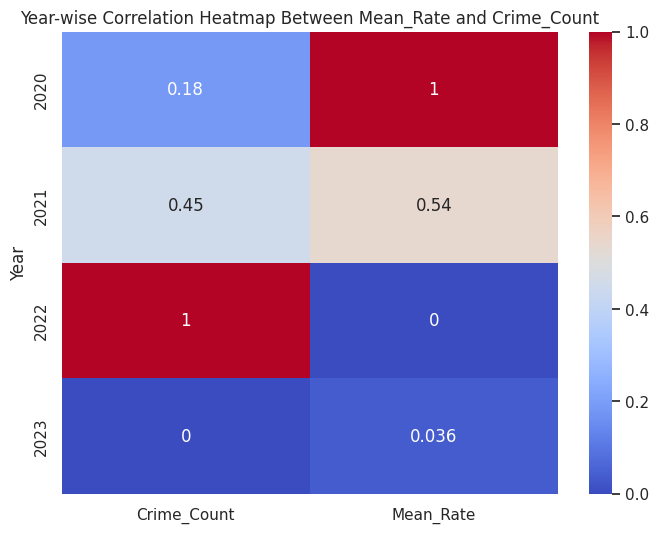

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'emp_crime' with 'Year', 'Crime_Count', and 'Mean_Rate' columns

# Create a year-wise correlation matrix
correlation = emp_crime['Crime_Count'].corr(emp_crime['Mean_Rate'])


# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(emp_crime[['Crime_Count', 'Mean_Rate']],annot=True, cmap='coolwarm', cbar=True)
plt.title("Year-wise Correlation Heatmap Between Mean_Rate and Crime_Count")
plt.show()


In [ ]:
poverty = pd.read_csv('/content/drive/MyDrive/content/poverty.csv', delimiter=",")
poverty.head()

,ID Race,Race,ID Year,Year,ID Poverty Status,Poverty Status,Poverty Population,Poverty Population Moe,Geography,ID Geography,Slug Geography,share,Sex,ID Sex
0,1,White,2021,2021,0,Income In The Past 12 Months Below Poverty Level,244039,4031.489179,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.102220,Male,0
1,1,White,2021,2021,0,Income In The Past 12 Months Below Poverty Level,292782,4341.558821,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.122636,Female,1
2,2,Black,2021,2021,0,Income In The Past 12 Months Below Poverty Level,70741,2245.161464,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.029631,Male,0
3,2,Black,2021,2021,0,Income In The Past 12 Months Below Poverty Level,83380,2499.522554,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.034925,Female,1
4,3,Native American,2021,2021,0,Income In The Past 12 Months Below Poverty Level,7368,684.054091,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.003086,Male,0


In [ ]:
columns_to_drop = ['tract', 'Geography', 'ID Geography']

In [ ]:
poverty = poverty[(poverty['Year']==2020) | (poverty['Year'] == 2021)]
poverty.head()

,ID Race,Race,ID Year,Year,ID Poverty Status,Poverty Status,Poverty Population,Poverty Population Moe,Geography,ID Geography,Slug Geography,share,Sex,ID Sex
0,1,White,2021,2021,0,Income In The Past 12 Months Below Poverty Level,244039,4031.489179,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.102220,Male,0
1,1,White,2021,2021,0,Income In The Past 12 Months Below Poverty Level,292782,4341.558821,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.122636,Female,1
2,2,Black,2021,2021,0,Income In The Past 12 Months Below Poverty Level,70741,2245.161464,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.029631,Male,0
3,2,Black,2021,2021,0,Income In The Past 12 Months Below Poverty Level,83380,2499.522554,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.034925,Female,1
4,3,Native American,2021,2021,0,Income In The Past 12 Months Below Poverty Level,7368,684.054091,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.003086,Male,0


In [ ]:
poverty = poverty.groupby('Year')['Poverty Population'].sum().reset_index()
poverty

,Year,Poverty Population
0,2020,2453311
1,2021,2387401


In [ ]:
combined_data = pd.merge(crime_counts, poverty, on='Year')
combined_data

,Year,Crime_Count,Poverty Population
0,2021,178716,2387401
1,2020,166720,2453311


In [ ]:
weapongrp= crime.groupby('Weapon Desc')
n = weapongrp.ngroups
n

80

4.6 Frequency of crime by days of the weeks

In [ ]:
crime['dow'] = pd.to_datetime(crime['DATE OCC']).dt.day_name()


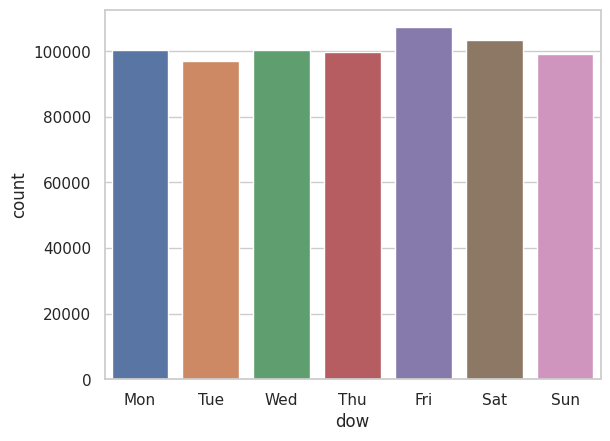

In [ ]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax = sns.countplot(x = "dow", data = crime, order=day_order)
ax.set_xticklabels(ax.get_xticklabels())
custom_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(range(0, 7), custom_labels)

plt.show()

4.7 Major policy changes on crime rates

In [ ]:
covid_data = pd.read_csv('/content/drive/MyDrive/content/covid_data.csv', delimiter=",")

In [ ]:
# Convert the date column to a datetime data type
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Convert the date column to a datetime data type
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Extract the year from the date
covid_data['Year'] = covid_data['date'].dt.year

# Find the last date of each year
last_date_of_year = covid_data[covid_data.groupby('Year')['date'].transform('max') == covid_data['date']]

# Drop duplicate years to keep only the latest date for each year
last_date_of_year = last_date_of_year.drop_duplicates('Year')

# Select relevant columns (Year, date, cases)
covid_data = last_date_of_year[['Year', 'date', 'cases']]

# Display the last date and COVID-19 cases for each year
print(covid_data)

      Year       date    cases
203   2021 2021-12-31  1780154
658   2020 2020-12-31   829549
1119  2022 2022-12-31  3638639
2696  2023 2023-03-06  3710586


In [ ]:
crime_counts = crime['Year'].value_counts().reset_index()
crime_counts.columns = ['Year', 'Crime_Count']
policy =pd.merge(covid_data, crime_counts, on='Year')
policy = policy.sort_values(by='Year', ascending=True)
policy

# policy


,Year,date,cases,Crime_Count
1,2020,2020-12-31,829549,166720
0,2021,2021-12-31,1780154,178716
2,2022,2022-12-31,3638639,203185
3,2023,2023-03-06,3710586,158493


In [ ]:
df = pd.DataFrame(policy)

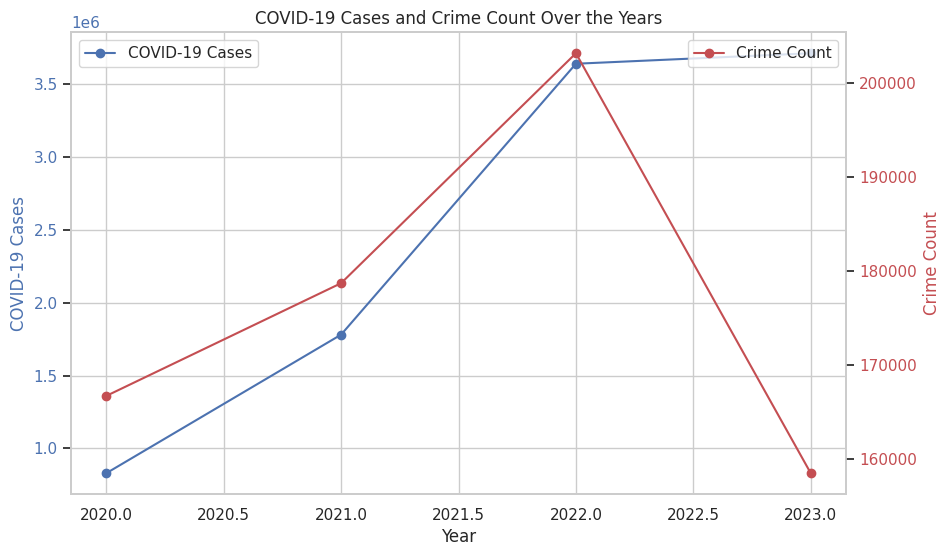

In [ ]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first dataset (COVID-19 Cases) on the primary y-axis
ax1.plot(df['Year'], df['cases'], label='COVID-19 Cases', marker='o', linestyle='-', color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('COVID-19 Cases', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(df['Year'], df['Crime_Count'], label='Crime Count', marker='o', linestyle='-', color='r')
ax2.set_ylabel('Crime Count', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add titles and legends
plt.title('COVID-19 Cases and Crime Count Over the Years')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid()
plt.show()

4.8 Demographic Factors

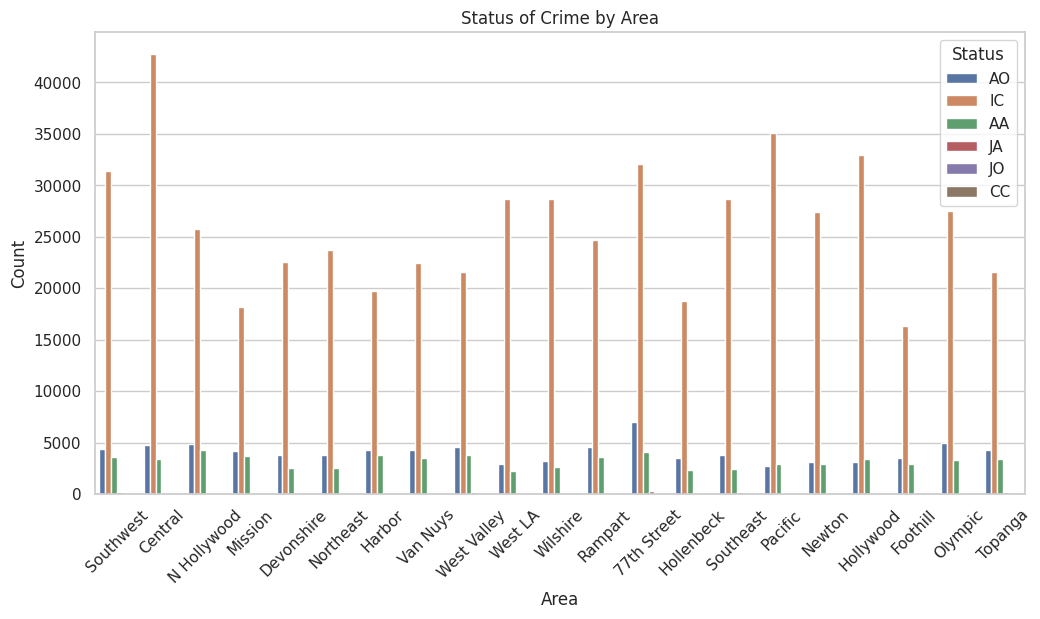

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a 'Status' column and an 'AREA' column in your DataFrame

# Create a countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=crime, x='AREA NAME', hue='Status')
plt.title('Status of Crime by Area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status', loc='upper right')
plt.show()


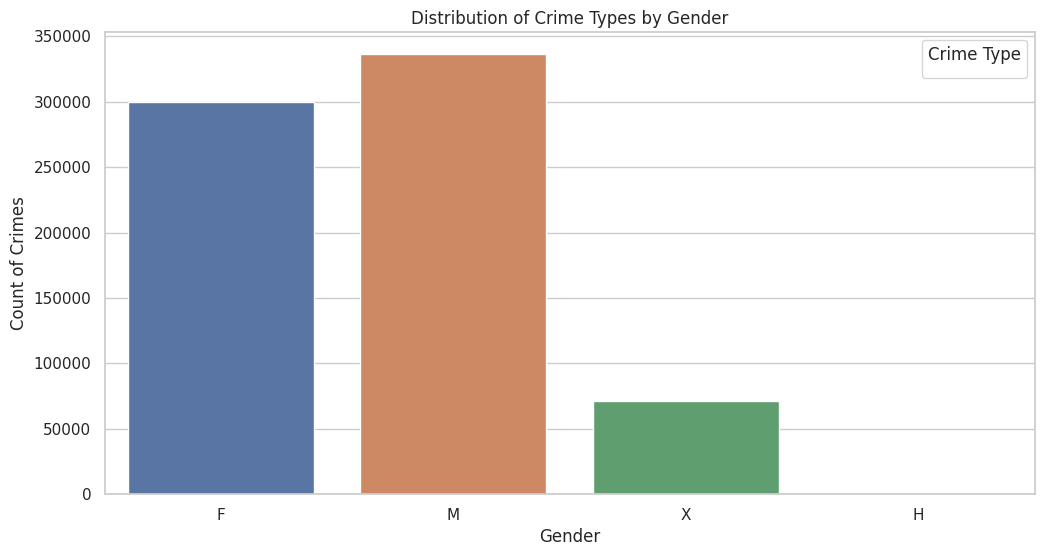

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=crime, x='Vict Sex')
plt.title('Distribution of Crime Types by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Crimes')

plt.legend(title='Crime Type', loc='upper right')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


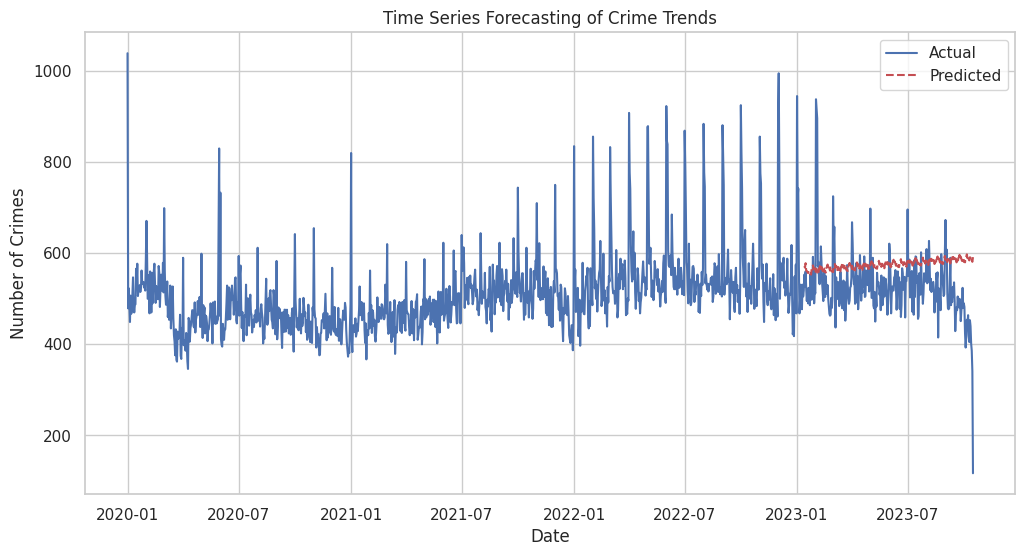

In [ ]:
import statsmodels.api as sm

crime_by_date = crime.groupby('DATE OCC').size().reset_index(name='Crime Count')
crime_by_date.set_index('DATE OCC', inplace=True)

train_data = crime_by_date.iloc[:int(0.8 * len(crime_by_date))]
test_data = crime_by_date.iloc[int(0.8 * len(crime_by_date)):]

# Fit the SARIMAX model
model = sm.tsa.SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Forecast future crime trends
forecast = model_fit.get_forecast(steps=len(test_data))
predicted_values = forecast.predicted_mean

# Plot the predicted values and the actual values
plt.figure(figsize=(12, 6))
plt.plot(crime_by_date.index, crime_by_date, label='Actual')
plt.plot(test_data.index, predicted_values, label='Predicted', linestyle='--', color='r')
plt.title('Time Series Forecasting of Crime Trends')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()
plt.show()

4.9 Patterns between Demographic Factors and Specific Type of Crimes

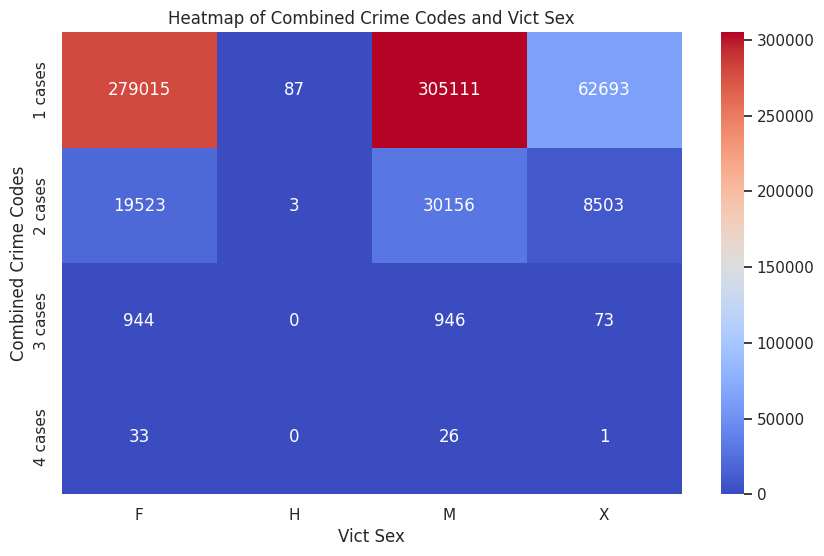

In [ ]:

# Create a pivot table
pivot_table = crime.pivot_table(index='Combined_Crime_Codes', columns='Vict Sex', aggfunc='size', fill_value=0)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Heatmap of Combined Crime Codes and Vict Sex')
plt.xlabel('Vict Sex')
plt.ylabel('Combined Crime Codes')
plt.show()


In [ ]:
crime['Weapon'] = (crime['Weapon Desc'] != 'No Weapon Used').astype(int)
print(crime[['Weapon Desc', 'Weapon']])


                                           Weapon Desc  Weapon
0       STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)       1
1                          UNKNOWN WEAPON/OTHER WEAPON       1
2                                       No Weapon Used       0
3                                       No Weapon Used       0
4                                       No Weapon Used       0
...                                                ...     ...
820594                                  No Weapon Used       0
820595  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)       1
820596                     UNKNOWN WEAPON/OTHER WEAPON       1
820597                                  No Weapon Used       0
820598                                  No Weapon Used       0

[707114 rows x 2 columns]


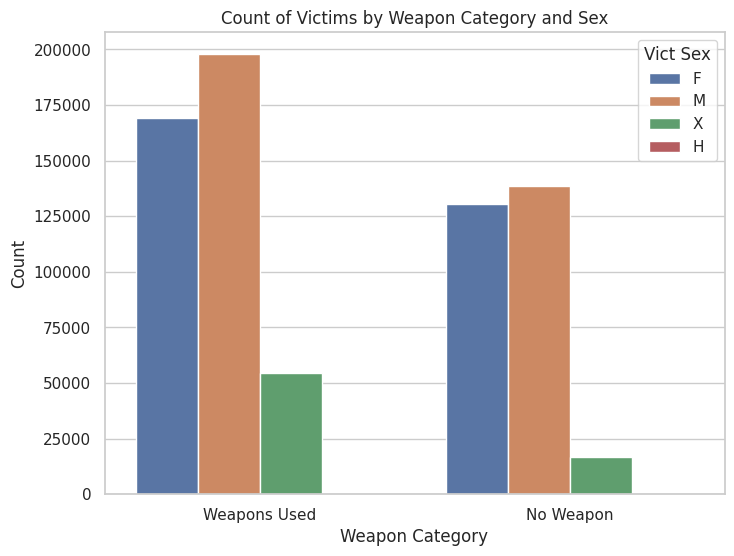

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=crime, x='Weapon', hue='Vict Sex')
plt.title('Count of Victims by Weapon Category and Sex')
plt.xlabel('Weapon Category')
plt.ylabel('Count')
plt.xticks([1, 0], ['No Weapon', 'Weapons Used'])
plt.legend(title='Vict Sex')
plt.show()

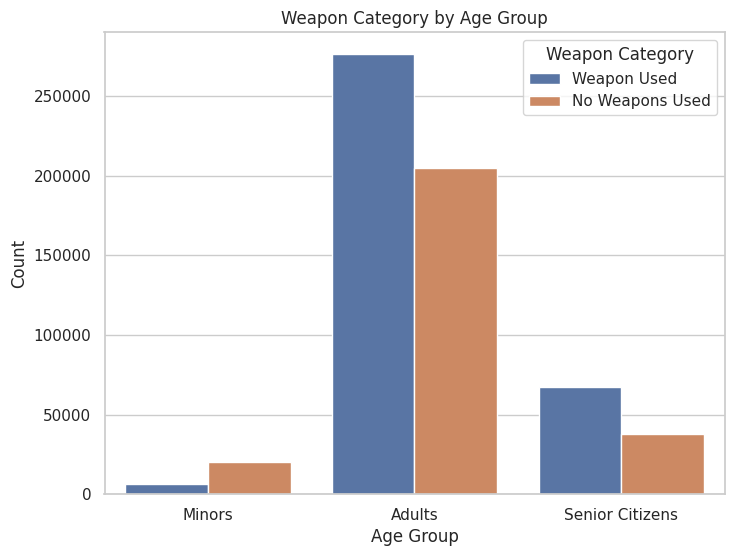

In [ ]:
# Create a new column 'Age_Group' based on age categorization
crime['Age_Group'] = pd.cut(crime['Vict Age'], bins=[0, 18, 55, float('inf')], labels=['Minors', 'Adults', 'Senior Citizens'])

# Create a countplot to visualize the relationship between 'Age_Group' and 'Weapon_Category'
plt.figure(figsize=(8, 6))
sns.countplot(data=crime, x='Age_Group', hue='Weapon')
plt.title('Weapon Category by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Weapon Category', labels=['Weapon Used', 'No Weapons Used'])
plt.show()


<ipython-input-70-fa1044d122ed>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_crime_data['Crm Cd Desc Short'] = top_10_crime_data['Crm Cd Desc'].str.split().str[:3].str.join(' ')


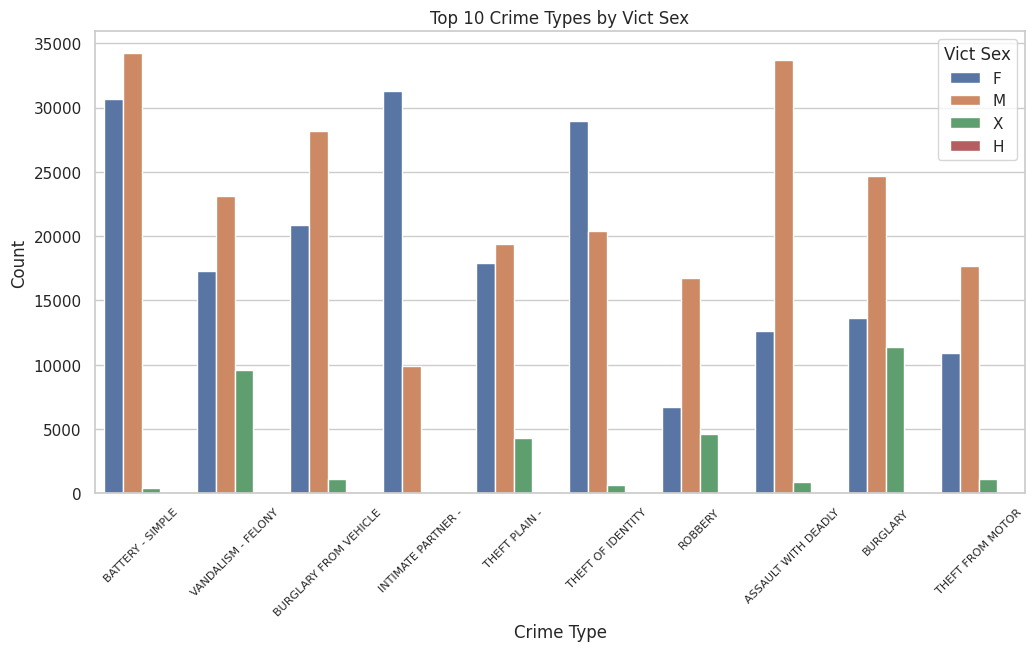

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each crime type and select the top 10
top_10_crime_types = crime['Crm Cd Desc'].value_counts().nlargest(10).index

# Filter the data for the top 10 crime types
top_10_crime_data = crime[crime['Crm Cd Desc'].isin(top_10_crime_types)]
top_10_crime_data['Crm Cd Desc Short'] = top_10_crime_data['Crm Cd Desc'].str.split().str[:3].str.join(' ')

# Create a countplot to visualize the relationship between 'Crm Cd Desc' and 'Vict Sex'
plt.figure(figsize=(12, 6))
sns.countplot(data=top_10_crime_data, x='Crm Cd Desc Short', hue='Vict Sex')
plt.title('Top 10 Crime Types by Vict Sex')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.xticks(fontsize=8)
plt.legend(title='Vict Sex', loc='upper right')
plt.show()


**5. ARIMA Model**

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
crime['DATE OCC'] = pd.to_datetime(crime['DATE OCC'])
crime.set_index('DATE OCC', inplace = True)
resampled_data = crime['DR_NO'].resample('D').count().fillna(0)

In [ ]:
model = ARIMA(resampled_data, order=(5,1,0))
model_fit = model.fit()

In [ ]:
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

<ipython-input-75-e9b974ab3ef1>:6: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  date_range = pd.date_range(start=resampled_data.index[-1], periods=forecast_steps + 1, closed='right')


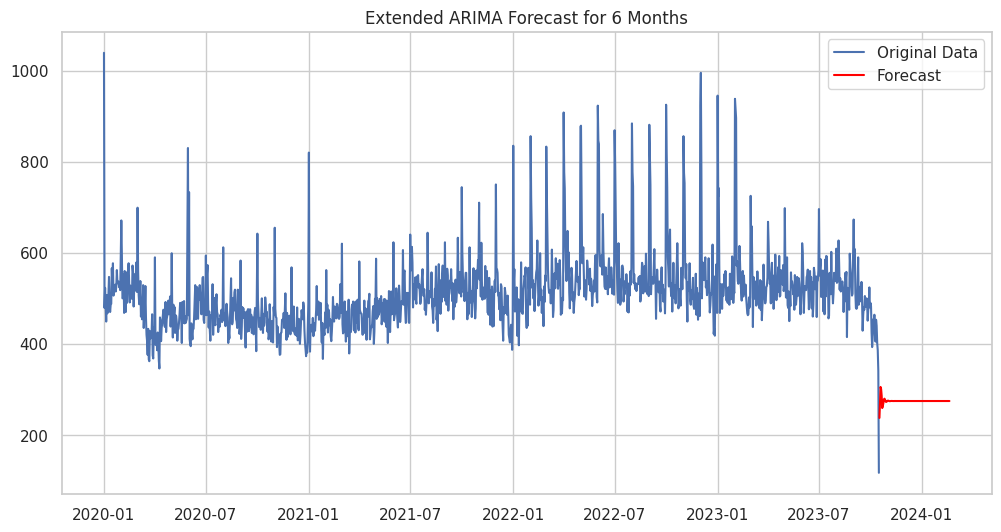

In [ ]:
# Calculate the number of business days in 6 months (approximately 21 business days per month)
forecast_months = 6
forecast_steps = forecast_months * 21

# Generate the date range for the extended forecast
date_range = pd.date_range(start=resampled_data.index[-1], periods=forecast_steps + 1, closed='right')

# Perform the extended forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the extended forecast
plt.figure(figsize=(12, 6))
plt.plot(resampled_data, label='Original Data')
plt.plot(date_range, forecast, label='Forecast', color='red')
plt.legend()
plt.title('Extended ARIMA Forecast for 6 Months')
plt.show()


<ipython-input-87-21fb89cc2f36>:19: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  date_range = pd.date_range(start=resampled_data.index[-1], periods=forecast_steps, closed='right')


ValueError: ignored

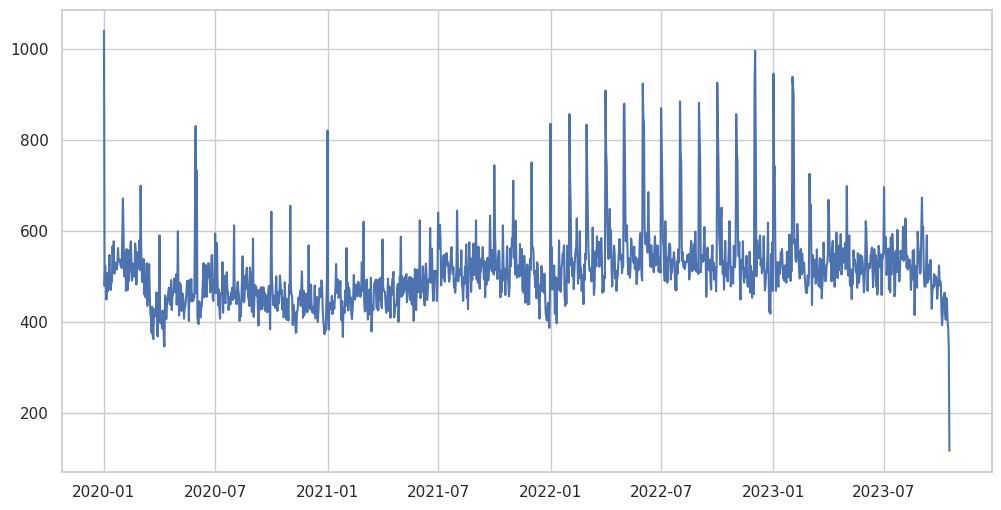

In [ ]:
import statsmodels.api as sm
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have already prepared the 'resampled_data' DataFrame

# Define the ARIMA model
model = ARIMA(resampled_data, order=(5, 1, 0))
model_fit = model.fit()

# Specify the number of periods you want to forecast
forecast_months = 6
forecast_steps = forecast_months * 30  # Assuming 30 days per month

# Perform the forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Generate the date range for the extended forecast
date_range = pd.date_range(start=resampled_data.index[-1], periods=forecast_steps, closed='right')

# Plot the extended forecast
plt.figure(figsize=(12, 6))
plt.plot(resampled_data, label='Original Data')
plt.plot(date_range, forecast, label='Forecast', color='red')
plt.legend()
plt.title('Extended ARIMA Forecast for 6 Months')
plt.show()



